# Défi open data : Energie en France

Aujourd’hui, 55% de l’énergie consommée en France est produite sur le territoire et le pays importe la quasi-totalité des énergies fossiles dont il a besoin. Ainsi, 17% de ses approvisionnements en gaz proviennent de Russie.

Les tensions sur les ressources énergétiques sont nombreuses, notamment en lien avec le contexte géopolitique, et se multiplient récemment. À titre d’exemple, la guerre en Ukraine et les sanctions prises à l’encontre de la Russie ont induit **d’importantes tensions sur les marchés du gaz et du pétrole** dont les conséquences ont été visibles dans l’hiver 2022-2023.

**La problématique du défi**

Ce projet vous propose : 
* **d’analyser les crises passées, avec un focus sur la crise de l’énergie pendant l’hiver 2022-2023**
* **de formuler des prédictions sur l'énergie en France les prochains hivers** (approvisionnement, production, consommation).

Beaucoup de données ouvertes sont mises à disposition pour vous permettre de répondre à ce sujet. Plusieurs jeux de données ont déjà été chargés dans cet environnement ([cf. liste](https://defis.data.gouv.fr/defis/65a92372953d21f206abb110/)) et vous pouvez bien évidemment en ajouter d’autres selon vos besoins.

Une fois vos travaux terminés, partagez-les avec l’ensemble de la communauté [en publiant une réutilisation sur data.gouv.fr](https://guides.data.gouv.fr/guide-data.gouv.fr/reutilisations) !

# Importer des données
Nous mettons à disposition une fonction utilitaire qui permet de charger la majorité des ressources de data.gouv.fr à partir de leur identifiant sur le site (exemple : `"2876a346-d50c-4911-934e-19ee07b0e503"`). Vous pouvez l'utiliser comme suit :

In [1]:
from utils import load_table_from_resource_id

df = load_table_from_resource_id('1e7054f6-f0eb-4093-9d18-83349e71c8c3')
df

,tri,date,perimetre_juridique,perimetre_spatial,debit,unite,code_castor,x,y,z,point_geo
0,1,2020-01-01,EDF SA,Débit influencé journalier de l'Arve à Arthaz ...,40.954,m3/s,Q3061_DI1_J1,410,903797,2135469,"46.15097510198408, 6.270917270597431"
1,1,2001-01-01,EDF SA,Débit naturel journalier du Tarn à Pont de Mon...,20.884,m3/s,Q1670_DN1_J1,480,692413,1926450,"44.33305006067309, 3.494378970815297"
2,2,2001-01-01,EDF SA,"Centrale de Vallières, débit turbiné et dévers...",19.652,m3/s,VALLIH_DR1_J1,290,878030,2106542,"45.90209941712552, 5.920635351443814"
3,2,2020-01-02,EDF SA,Débit influencé journalier de l'Arve à Arthaz ...,39.664,m3/s,Q3061_DI1_J1,410,903797,2135469,"46.15097510198408, 6.270917270597431"
4,3,2001-01-01,EDF SA,"Centrale de Castelnau, débit entrant journalie...",30.794,m3/s,CSLNAH_DI1_J1,418,642767,1945075,"44.50534073159216, 2.874002809596831"
...,...,...,...,...,...,...,...,...,...,...,...
556403,493756,2019-11-09,EDF SA,Débit influencé journalier de l'Ain à Chalain ...,36.036,m3/s,Q3154_DI1_J1,456,862621,2192956,"46.684970341716024, 5.770888271334979"
556404,493757,2019-11-10,EDF SA,Débit influencé journalier de l'Ain à Chalain ...,25.966,m3/s,Q3154_DI1_J1,456,862621,2192956,"46.684970341716024, 5.770888271334979"
556405,493758,2019-11-11,EDF SA,Débit influencé journalier de l'Ain à Chalain ...,19.573,m3/s,Q3154_DI1_J1,456,862621,2192956,"46.684970341716024, 5.770888271334979"
556406,493759,2019-11-12,EDF SA,Débit influencé journalier de l'Ain à Chalain ...,17.221,m3/s,Q3154_DI1_J1,456,862621,2192956,"46.684970341716024, 5.770888271334979"


# Exemple de réalisation : évolution de la production d'électricité en France

In [23]:
import pandas as pd
import plotly.express as px

In [4]:
# on récupère les données de production d'électricité
df = load_table_from_resource_id('8e5f79e7-fdbd-4dfe-8d57-a00587a90bea')
df

,tri,annee,perimetre_juridique,perimetre_spatial,categorie,category,sous_categorie,sub_category,valeur,unite
0,1,2022,EDF SA,France,Source d'énergie d'électricité fournie,Energy source of electricity supplied,Nucléaire,Nuclear,66.614,%
1,2,2022,EDF SA,France,Source d'énergie d'électricité fournie,Energy source of electricity supplied,Fioul,Fuel,1.100,%
2,3,2022,EDF SA,France,Source d'énergie d'électricité fournie,Energy source of electricity supplied,Hydraulique,Hydraulic,6.010,%
3,4,2022,EDF SA,France,Source d'énergie d'électricité fournie,Energy source of electricity supplied,Charbon,Coal,4.940,%
4,5,2022,EDF SA,France,Source d'énergie d'électricité fournie,Energy source of electricity supplied,Gaz,Gas,13.660,%
...,...,...,...,...,...,...,...,...,...,...
64,65,2015,EDF SA,France,Source d'énergie d'électricité fournie,Energy source of electricity supplied,Gaz,Gas,0.800,%
65,66,2015,EDF SA,France,Source d'énergie d'électricité fournie,Energy source of electricity supplied,Autres Renouvelables,Other renewables,0.600,%
66,67,2015,EDF SA,France,Emission de CO2,CO2 Emission,CO2,CO2,25.020,g/kWh fourni
67,68,2015,EDF SA,France,Déchets radioactifs,Radioactive waste,Déchets radioactifs vie courte,Short-lived radioactive waste,11.100,mg/kWh fourni


In [6]:
# on ne garde que les sources d'électricité
df = df.loc[df['categorie'] == "Source d'énergie d'électricité fournie"]
df

,tri,annee,perimetre_juridique,perimetre_spatial,categorie,category,sous_categorie,sub_category,valeur,unite
0,1,2022,EDF SA,France,Source d'énergie d'électricité fournie,Energy source of electricity supplied,Nucléaire,Nuclear,66.614,%
1,2,2022,EDF SA,France,Source d'énergie d'électricité fournie,Energy source of electricity supplied,Fioul,Fuel,1.100,%
2,3,2022,EDF SA,France,Source d'énergie d'électricité fournie,Energy source of electricity supplied,Hydraulique,Hydraulic,6.010,%
3,4,2022,EDF SA,France,Source d'énergie d'électricité fournie,Energy source of electricity supplied,Charbon,Coal,4.940,%
4,5,2022,EDF SA,France,Source d'énergie d'électricité fournie,Energy source of electricity supplied,Gaz,Gas,13.660,%
5,6,2022,EDF SA,France,Source d'énergie d'électricité fournie,Energy source of electricity supplied,Autres Renouvelables,Other renewables,7.673,%
8,9,2021,EDF SA,France,Source d'énergie d'électricité fournie,Energy source of electricity supplied,Nucléaire,Nuclear,76.880,%
9,10,2021,EDF SA,France,Source d'énergie d'électricité fournie,Energy source of electricity supplied,Fioul,Fuel,0.800,%
10,11,2021,EDF SA,France,Source d'énergie d'électricité fournie,Energy source of electricity supplied,Hydraulique,Hydraulic,8.560,%
11,12,2021,EDF SA,France,Source d'énergie d'électricité fournie,Energy source of electricity supplied,Charbon,Coal,0.810,%


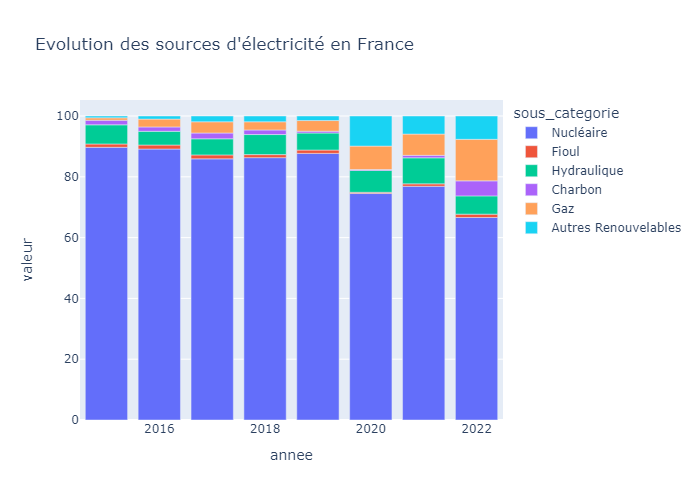

In [27]:
# graphe d'évolution des sources de production
fig = px.bar(
    df,
    x="annee",
    y="valeur",
    color="sous_categorie",
    title="Evolution des sources d'électricité en France"
)
fig.show(
#     renderer='png'
)
# on voit bien la fermeture de Fessenheim en 2020

In [39]:
# par quoi est remplacé le nucléaire ?
evolutions = {}
for cat in cats:
    tmp = (100 - df.loc[df['sous_categorie'] == cat, 'valeur']).to_list()
    evolutions[cat] = round(tmp[-1] - tmp[0], 2)
evolutions

{'Nucléaire': -23.09,
 'Fioul': 0.0,
 'Hydraulique': -0.29,
 'Charbon': 3.44,
 'Gaz': 12.86,
 'Autres Renouvelables': 7.07}

In [45]:
print(
    f'Entre {min(df["annee"])} et {max(df["annee"])} '
    f'le nucléaire a baissé de {abs(evolutions["Nucléaire"])}%\n'
    "Il a été remplacé par :"
)
for cat in cats:
    if cat != "Nucléaire":
        perc = round(abs(evolutions[cat] / evolutions["Nucléaire"])*100, 2)
        print(f" - '{cat}' à hauteur de {perc}%")

Entre 2015 et 2022 le nucléaire a baissé de 23.09%
Il a été remplacé par :
 - 'Fioul' à hauteur de 0.0%
 - 'Hydraulique' à hauteur de 1.26%
 - 'Charbon' à hauteur de 14.9%
 - 'Gaz' à hauteur de 55.7%
 - 'Autres Renouvelables' à hauteur de 30.62%
